In [213]:
#import necessary libraries 
# Data Preprocessing Libraries
import numpy as np
import pandas as pd   
#Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot
#Model Building and Prediction
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [127]:
mydata=pd.read_csv(r"E:\Codsoft\spam ML\spam.csv",encoding='ISO-8859-1')
mydata.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [122]:
mydata.describe()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [129]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


### Drop Unneeded Columns 

In [138]:
column_drop=['Unnamed: 2','Unnamed: 3','Unnamed: 4']
mydata.drop(columns=column_drop, inplace=True)

### Drop duplicated values

In [153]:
mydata_new=mydata.drop_duplicates()

print(mydata_new)

        v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5169 rows x 2 columns]


### Plotting all columns

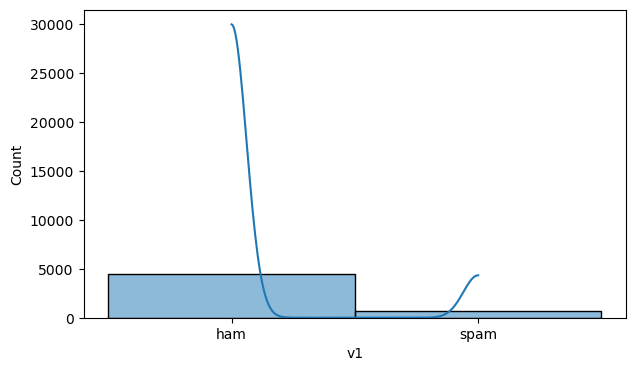

C:\Users\hp\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 137 (\x89) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
) missing from current font.te-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hp\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hp\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 139 (\x8b) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


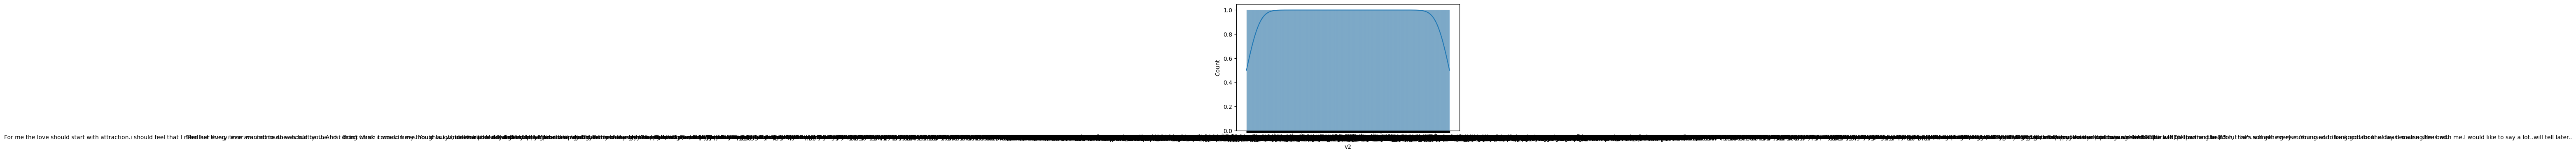

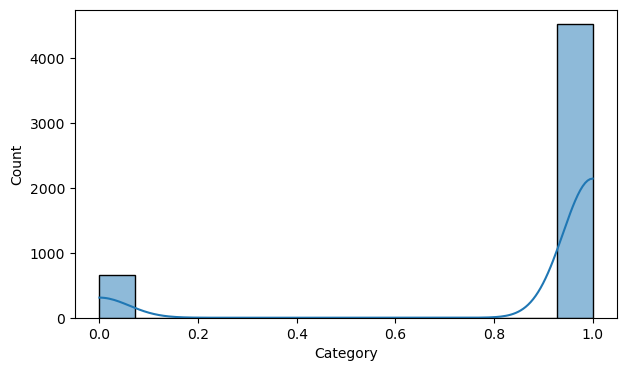

In [177]:
for i in mydata_new.columns:
    plt.figure (figsize=(7,4))
    sns.histplot(data=mydata_new,x=i,kde=True)
    plt.show()

### Add column category to V1

In [175]:
mydata_new.loc[mydata_new["v1"] == "spam", "Category"] = 0
mydata_new.loc[mydata_new["v1"] == "ham", "Category"] = 1

mydata_new.head()

,v1,v2,Category
0,ham,"Go until jurong point, crazy.. Available only ...",1.0
1,ham,Ok lar... Joking wif u oni...,1.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0.0
3,ham,U dun say so early hor... U c already then say...,1.0
4,ham,"Nah I don't think he goes to usf, he lives aro...",1.0


In [201]:
X = mydata_new['v2']
Y = mydata_new['Category']

### Model Building and Prediction

In [204]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

In [206]:
# Create a TF-IDF vectorizer to convert text messages to numerical features
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english',lowercase=True)
# Convert the training and testing text messages into numerical features using TF-IDF

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)
print(X_train)
print(X_train_features)
# Convert the target values into 0 and 1

Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)

2228                       Those were my exact intentions
5529                            What about this one then.
2149                   Waaaat?? Lololo ok next time then!
5058    Free video camera phones with Half Price line ...
5051    Tick, tick, tick .... Where are you ? I could ...
                              ...                        
4740    Many more happy returns of the day. I wish you...
474     Nice line said by a broken heart- Plz don't cu...
3266                    Ok then i come n pick u at engin?
4016    Eek that's a lot of time especially since Amer...
879     U have a Secret Admirer who is looking 2 make ...
Name: v2, Length: 4135, dtype: object
  (0, 3545)	0.7455593142248959
  (0, 2588)	0.6664392762829205
  (2, 6589)	0.3136674984299076
  (2, 4696)	0.29654379102529516
  (2, 4002)	0.6378379419700079
  (2, 6999)	0.6378379419700079
  (3, 564)	0.2785767488573773
  (3, 1534)	0.23384958966251285
  (3, 52)	0.26549489341098675
  (3, 4344)	0.22076773421612225
  (3, 6770)	0

In [218]:
model = LogisticRegression()
model.fit(X_train_features,Y_train)

LogisticRegression()

In [220]:
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

# Print accuracy
print('Accuracy on training data: {} %'.format(accuracy_on_training_data * 100))
print('Accuracy on test data: {} %'.format(accuracy_on_test_data * 100))

Accuracy on training data: 96.13059250302297 %
Accuracy on test data: 96.42166344294004 %
